In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [1]:
import pandas as pd

In [7]:
data_path = r"D:\datasets\cv-corpus-19.0-2024-09-13-fr\cv-corpus-19.0-2024-09-13\fr"
data_path = r"/mnt/d/datasets/cv-corpus-19.0-2024-09-13-fr/cv-corpus-19.0-2024-09-13/fr"

In [8]:
# Load the data
data = pd.read_table(f"{data_path}/validated.tsv")

/tmp/ipykernel_124493/3799690839.py:2: DtypeWarning: Columns (4,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(f"{data_path}/validated.tsv")


In [9]:
keep_columns = ['path', 'sentence','age', 'gender',]
export_df = data.copy()[keep_columns]

In [10]:
#filter out the rows with missing values
import math
print(export_df.isnull().sum()/len(export_df)*100)
print("with na : ", export_df.shape)
print("without na : ",export_df.dropna().shape)
print(f"percent of data lost : {math.floor((export_df.shape[0] - export_df.dropna().shape[0])/export_df.shape[0]*100)}%")
filtered_df = export_df.copy().dropna()
filtered_df = filtered_df[filtered_df['gender'] != "non-binary"]
filtered_df = filtered_df[filtered_df['gender'] != "do_not_wish_to_say"]

path         0.000000
sentence     0.000000
age         36.111859
gender      30.482791
dtype: float64
with na :  (739181, 4)
without na :  (463265, 4)
percent of data lost : 37%


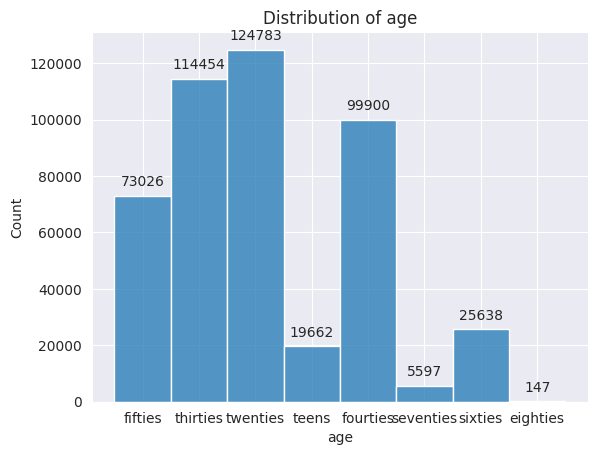

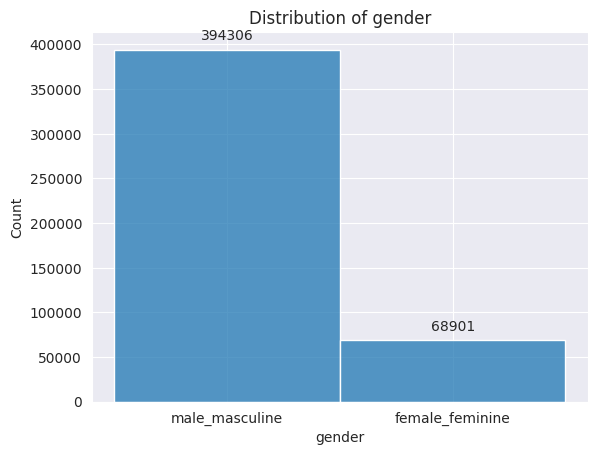

In [11]:
# plot the distribution of all the columns with the count of the values
import matplotlib.pyplot as plt
import seaborn as sns

for col in filtered_df.columns:
    if col in ['path',"sentence"]:
        continue
    
    plt.figure()
    ax = sns.histplot(filtered_df[col],stat="count")
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.title(f"Distribution of {col}")
    plt.show()

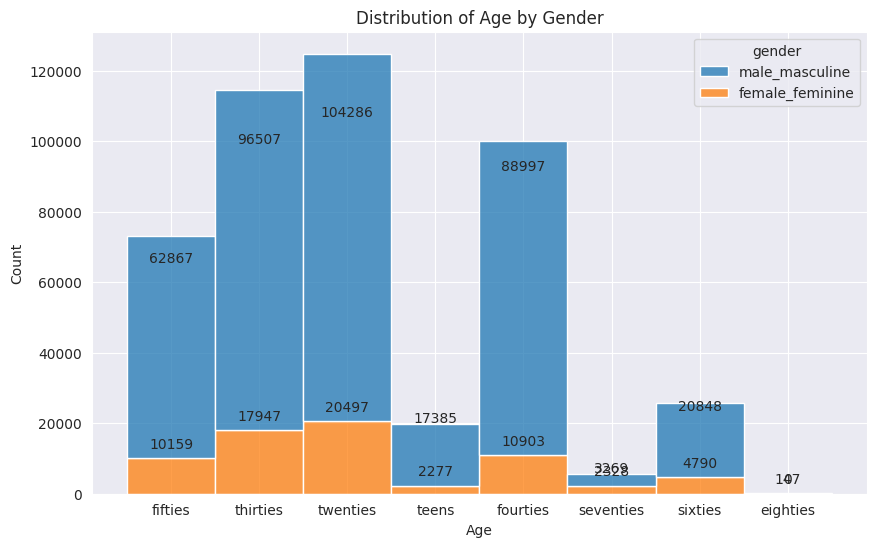

In [12]:
# plot the distribution of the age by gender

# plot the distribution of age by gender
import matplotlib.pyplot as plt
import seaborn as sns
def show_distrib(df):
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data=df, x='age', hue='gender', multiple='stack', stat='count')

    # Annotate the bars with their counts
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.title('Distribution of Age by Gender')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

show_distrib(filtered_df)

In [13]:
# export a csv with X rows by age category with the same distribution of men and woman
age_df_list = []
for row_per_age in [10]:
    for age in filtered_df['age'].unique():
        df_age = filtered_df[filtered_df['age'] == age]
        df_male = df_age[df_age['gender'] == 'male_masculine']
        df_female = df_age[df_age['gender'] == 'female_feminine']
        count_per_gender = min(row_per_age, len(df_female))
        df_tmp = pd.concat([df_female[:count_per_gender], df_male[:count_per_gender]])
        age_df_list.append(df_tmp)
    export_df = pd.concat(age_df_list)
    export_df.to_csv(f"{data_path}/validated_filtered_{row_per_age}_per_age.csv", index=False)
export_df.head()

,path,sentence,age,gender
65,common_voice_fr_17323684.mp3,Puis me regardant d'un air peu sympathique,fifties,female_feminine
367,common_voice_fr_19737278.mp3,Ronit est une jeune femme indépendante qui tra...,fifties,female_feminine
772,common_voice_fr_22078126.mp3,cinq,fifties,female_feminine
773,common_voice_fr_22078130.mp3,non,fifties,female_feminine
922,common_voice_fr_22765327.mp3,La technique des statues de terre cuite témoig...,fifties,female_feminine


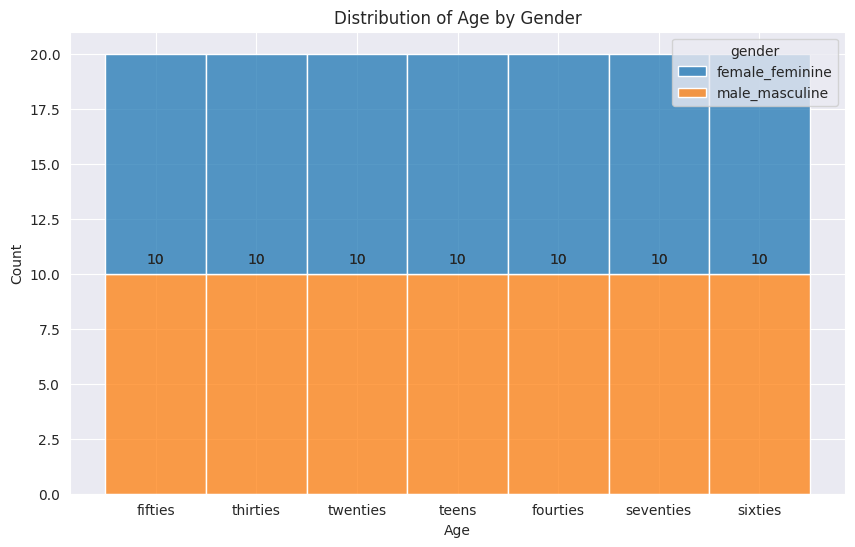

In [14]:
show_distrib(export_df)